In [1]:
import pandas as pd # pandas는 데이터 분석용 라이브러리
import numpy as np # numpy는 수치 계산 라이브러리
import seaborn as sns # seaborn은 matplotlib을 사용하기 쉽게 만든 시각화 라이브러리
import matplotlib.pyplot as plt # matplotlib은 그래프의 폰트 바꾸기, 스타일 변경, 사이즈 조정, 서브 플롯 사용을 위해 로드하는 라이브러리
import os
import sys

In [2]:
sys.stdin.encoding # 인코딩 뭐로 해야하는지 확인하는 코드

'cp949'

In [3]:
if os.name == 'posix':

    plt.rc("font", family="AppleGothic")


else :

    plt.rc("font", family="Malgun Gothic")
    plt.rc("axes", unicode_minus=False) # 마이너스 폰트가 깨지는 문제를 대처하기 위해 코드를 작성


%config InlineBackend.figure_format = 'retina' # 글씨가 흐릿하게 보이는 현상을 막기 위해 레티나 설정


In [63]:
df = pd.read_csv('./datasets/health.csv', encoding="utf-8",
                index_col=0)
df.info()  

C:\Users\82102\anaconda3\envs\my\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\82102\anaconda3\envs\my\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13233166 entries, 0 to 13233165
Data columns (total 28 columns):
 #   Column       Dtype  
---  ------       -----  
 0   가입자일련번호      int64  
 1   성별코드         int64  
 2   연령대코드(5세단위)  int64  
 3   시도코드         int64  
 4   신장(5Cm단위)    int64  
 5   체중(5Kg 단위)   int64  
 6   허리둘레         float64
 7   시력(좌)        float64
 8   시력(우)        float64
 9   청력(좌)        float64
 10  청력(우)        float64
 11  수축기혈압        float64
 12  이완기혈압        float64
 13  식전혈당(공복혈당)   float64
 14  총콜레스테롤       float64
 15  트리글리세라이드     float64
 16  HDL콜레스테롤     float64
 17  LDL콜레스테롤     float64
 18  혈색소          float64
 19  요단백          float64
 20  혈청크레아티닌      float64
 21  (혈청지오티)AST   float64
 22  (혈청지오티)ALT   float64
 23  감마지티피        float64
 24  흡연상태         float64
 25  음주여부         object 
 26  데이터공개일자      object 
 27  데이터 기준일자     object 
dtypes: float64(19), int64(6), object(3)
memory usage: 2.9+ GB


In [64]:
del df['데이터공개일자']

In [65]:
del df['데이터 기준일자']

In [9]:
df.columns # column 이름들만 모아서 보기
df.dtypes # dtypes는 데이터 타입만 출력

가입자일련번호          int64
성별코드             int64
연령대코드(5세단위)      int64
시도코드             int64
신장(5Cm단위)        int64
체중(5Kg 단위)       int64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태           float64
음주여부            object
dtype: object

In [67]:
df = pd.read_csv('./datasets/health_123.csv', encoding="utf-8",
                index_col=0)
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944489 entries, 0 to 3944488
Data columns (total 26 columns):
 #   Column       Dtype  
---  ------       -----  
 0   가입자일련번호      int64  
 1   성별코드         int64  
 2   연령대코드(5세단위)  int64  
 3   시도코드         int64  
 4   신장(5Cm단위)    int64  
 5   체중(5Kg 단위)   int64  
 6   허리둘레         int64  
 7   시력(좌)        float64
 8   시력(우)        float64
 9   청력(좌)        float64
 10  청력(우)        float64
 11  수축기혈압        int64  
 12  이완기혈압        int64  
 13  식전혈당(공복혈당)   int64  
 14  총콜레스테롤       int64  
 15  트리글리세라이드     int64  
 16  HDL콜레스테롤     float64
 17  LDL콜레스테롤     float64
 18  혈색소          float64
 19  요단백          float64
 20  혈청크레아티닌      float64
 21  (혈청지오티)AST   int64  
 22  (혈청지오티)ALT   int64  
 23  감마지티피        int64  
 24  흡연상태         float64
 25  음주여부         object 
dtypes: float64(10), int64(15), object(1)
memory usage: 812.5+ MB


In [58]:
str_expr = "(age == 10) and (weight >= 30)" # 나이가 10이고 몸무게가 30kg 이상이다 (소문자 논리연산 and)
df_q = df.query(str_expr)                   # 조건 부합 데이터 추출
display_side_by_side(df, df_q)

0           False
1           False
2           False
3           False
4           False
            ...  
13233161    False
13233162     True
13233163    False
13233164    False
13233165    False
Name: 수축기혈압, Length: 13233166, dtype: bool

In [72]:
df['수축기혈압'] >= 140

0          False
1          False
2          False
3          False
4          False
           ...  
3944484    False
3944485    False
3944486     True
3944487    False
3944488     True
Name: 수축기혈압, Length: 3944489, dtype: bool

In [75]:
df_1=df['수축기혈압'][df['수축기혈압'] >= 140]

In [81]:
df_1=df[(df['수축기혈압'] >= 140)]

In [84]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425593 entries, 78 to 3944488
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   가입자일련번호      425593 non-null  int64  
 1   성별코드         425593 non-null  int64  
 2   연령대코드(5세단위)  425593 non-null  int64  
 3   시도코드         425593 non-null  int64  
 4   신장(5Cm단위)    425593 non-null  int64  
 5   체중(5Kg 단위)   425593 non-null  int64  
 6   허리둘레         425593 non-null  int64  
 7   시력(좌)        425593 non-null  float64
 8   시력(우)        425593 non-null  float64
 9   청력(좌)        425593 non-null  float64
 10  청력(우)        425593 non-null  float64
 11  수축기혈압        425593 non-null  int64  
 12  이완기혈압        425593 non-null  int64  
 13  식전혈당(공복혈당)   425593 non-null  int64  
 14  총콜레스테롤       425593 non-null  int64  
 15  트리글리세라이드     425593 non-null  int64  
 16  HDL콜레스테롤     425593 non-null  float64
 17  LDL콜레스테롤     425593 non-null  float64
 18  혈색소          425593 no

In [83]:
df_1.to_csv('./datasets/140up.csv')#혈압 140이상인 사람만 추출

In [130]:
df = pd.read_csv('./datasets/140up.csv', encoding="utf-8",
                index_col=0)

In [131]:
df['수축기혈압']

78         140
318        150
756        150
772        141
1060       141
          ... 
3944480    153
3944482    140
3944483    140
3944486    140
3944488    150
Name: 수축기혈압, Length: 425593, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425593 entries, 78 to 3944488
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   가입자일련번호      425593 non-null  int64  
 1   성별코드         425593 non-null  int64  
 2   연령대코드(5세단위)  425593 non-null  int64  
 3   시도코드         425593 non-null  int64  
 4   신장(5Cm단위)    425593 non-null  int64  
 5   체중(5Kg 단위)   425593 non-null  int64  
 6   허리둘레         425593 non-null  int64  
 7   시력(좌)        425593 non-null  float64
 8   시력(우)        425593 non-null  float64
 9   청력(좌)        425593 non-null  float64
 10  청력(우)        425593 non-null  float64
 11  수축기혈압        425593 non-null  int64  
 12  이완기혈압        425593 non-null  int64  
 13  식전혈당(공복혈당)   425593 non-null  int64  
 14  총콜레스테롤       425593 non-null  int64  
 15  트리글리세라이드     425593 non-null  int64  
 16  HDL콜레스테롤     425593 non-null  float64
 17  LDL콜레스테롤     425593 non-null  float64
 18  혈색소          425593 no

<AxesSubplot:>

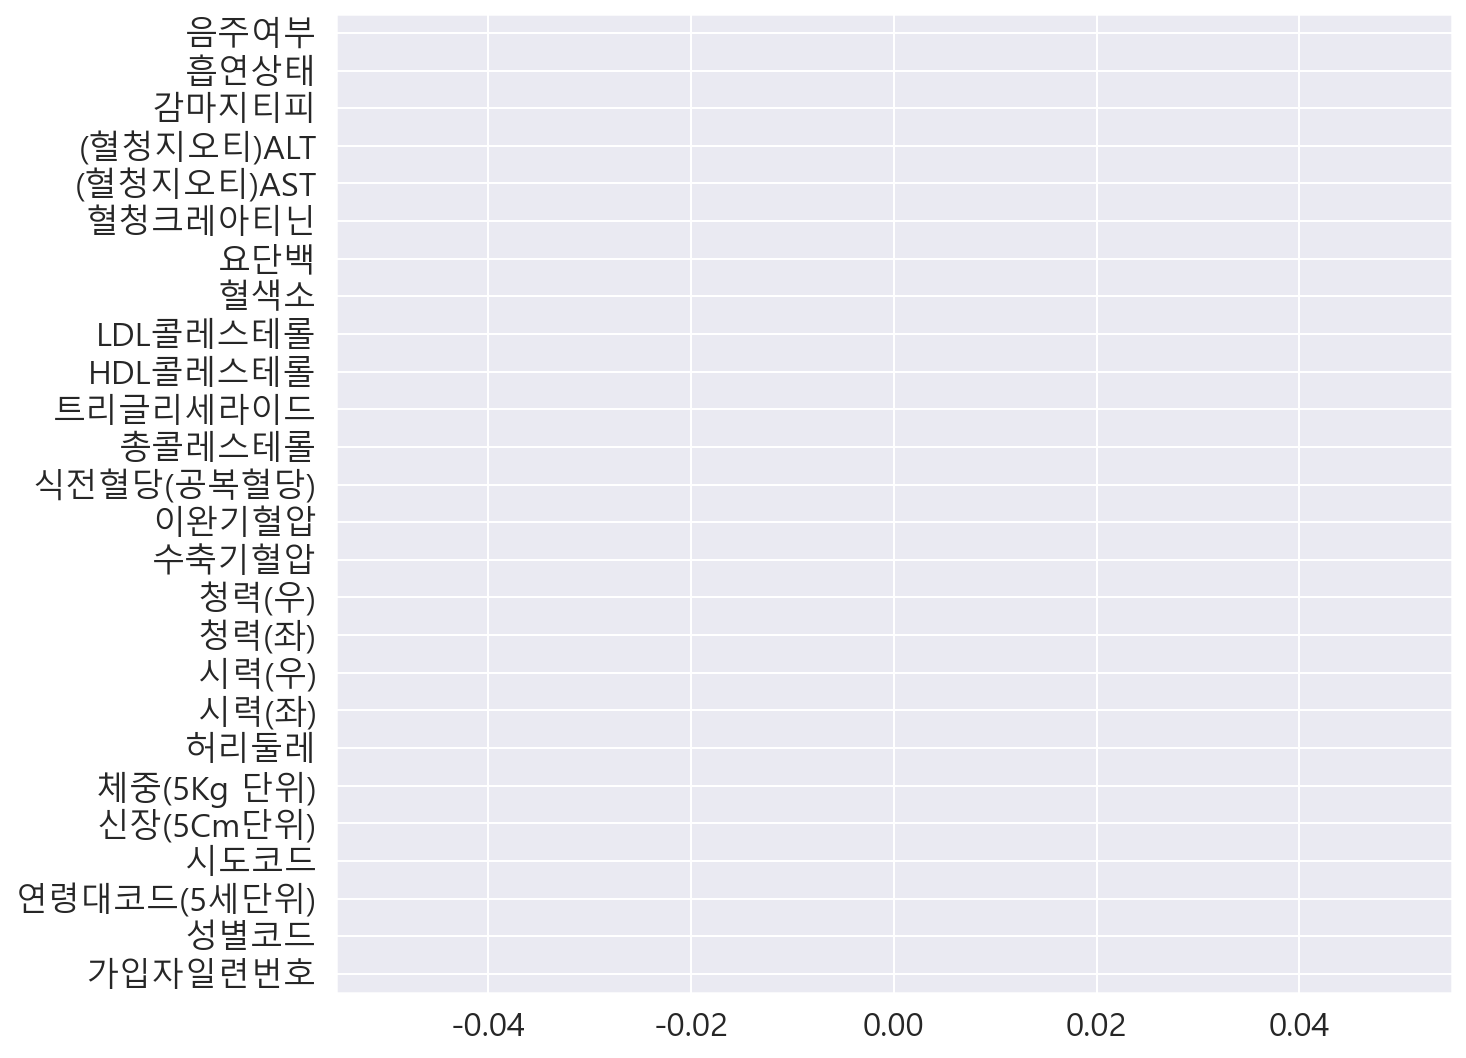

In [132]:
#결측치 확인
df.isnull() # isnull()으로 결측치를 bool 값으로 표시하고, sum()으로 결측치의 수

df.isna().sum() # isna()으로도 결측치 수를 집계

df.isnull().sum().plot.barh(figsize=(10,9)) # barh로 글씨를 y축에 두고, figsize 옵션으로 사이즈를 조절

In [133]:

#일부 데이터 요약하기

df["(혈청지오티)ALT"]

df[["(혈청지오티)ALT","(혈청지오티)AST"]]

# 2개 이상을 가져올 때는 리스트로 감싸기

# 1개의 열을 가져올 때는 series 형태의 데이터 구조로 결과가 나타나고, 2개 이상의 열을 가져올 때는 dataframe 형태의 데이터 구조로 가져온다.

df["(혈청지오티)ALT"].head()

df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe() 



,(혈청지오티)ALT,(혈청지오티)AST
count,425593.000000,425593.00000
mean,28.524252,28.30805
std,22.621788,17.80042
min,1.000000,1.00000
25%,17.000000,20.00000
50%,23.000000,25.00000
75%,33.000000,31.00000
max,958.000000,992.00000


In [134]:
df[["신장(5Cm단위)","체중(5Kg 단위)","허리둘레"]].describe() #남녀 안 나누고 통으로 볼 때 

,신장(5Cm단위),체중(5Kg 단위),허리둘레
count,425593.000000,425593.000000,425593.000000
mean,160.548564,64.765245,84.732752
std,9.796894,12.411480,8.521812
min,120.000000,25.000000,51.000000
25%,155.000000,55.000000,79.000000
50%,160.000000,65.000000,85.000000
75%,170.000000,70.000000,90.000000
max,190.000000,130.000000,129.000000


In [136]:
# 성별 음주에 따른 키 / 1- 남자 . 2 - 여자
df.groupby(["성별코드", "음주여부"])["신장(5Cm단위)"].mean()
#술을 마시는 사람들의 키가 크다. 

성별코드  음주여부
1     N       165.226795
      Y       167.393129
2     N       151.267800
      Y       154.090286
Name: 신장(5Cm단위), dtype: float64

In [139]:
# 성별, 음주에 따른 무게 평균
df.groupby(["성별코드", "음주여부"])["체중(5Kg 단위)"].mean()

성별코드  음주여부
1     N       68.110415
      Y       70.786487
2     N       56.990936
      Y       59.114386
Name: 체중(5Kg 단위), dtype: float64

In [137]:
# 성별, 흡연에 따른 무게 평균  / # 1은 흡연하지 않는 사람, 2는 흡연하는 사람, 3은 흡연했지만 금연한 사람
#흡연하지 않는 사람들의 무게가 흡연을 하는 혹은 했던 사람들 보다 가볍다.
df.groupby(["성별코드", "흡연상태"])["체중(5Kg 단위)"].mean()

성별코드  흡연상태
1     1.0     68.892532
      2.0     69.779961
      3.0     71.024551
2     1.0     57.291068
      2.0     59.327731
      3.0     57.706938
Name: 체중(5Kg 단위), dtype: float64

In [138]:
# 성별, 흡연에 따른 신장 평균  / # 1은 흡연하지 않는 사람, 2는 흡연하는 사람, 3은 흡연했지만 금연한 사람
#흡연하지 않는 사람들의 키가 작다.
df.groupby(["성별코드", "흡연상태"])["신장(5Cm단위)"].mean()

성별코드  흡연상태
1     1.0     165.642580
      2.0     166.458141
      3.0     167.863232
2     1.0     151.623917
      2.0     154.444085
      3.0     154.138762
Name: 신장(5Cm단위), dtype: float64

In [88]:
df["성별코드"].value_counts() # value_counts()로 category나 text 형태 데이터의 빈도수를 체크

# 1 530410 남자

# 2 469590 여자

# Name: 성별코드, dtype: int64

df["흡연상태"].value_counts()

# 1은 흡연하지 않는 사람, 2는 흡연하는 사람, 3은 흡연했지만 금연한 사람
# 흡연하는 사람보다 금연하는 사람들이 많다
# 흡연하지 않는 사람들이 가장 많다.

1.0    2362076
3.0     977131
2.0     605282
Name: 흡연상태, dtype: int64

In [89]:
#groupby

df.groupby(["성별코드"]).mean()

# 성별코드 값에 따라 모든 열에 대한 평균을 구하기. 남성, 여성에 따른 데이터를 세기

df.groupby(["성별코드"]).count()

df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    2140755
2    1803734
Name: 가입자일련번호, dtype: int64

In [90]:
# 성별코드에 따라 음주 상태를 알아보기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N        690464
      Y       1450291
2     N       1335682
      Y        468052
Name: 가입자일련번호, dtype: int64

In [91]:
# 감마지피티는 간수치에 관련된 데이터 / 성별, 음주에 따른 간 상태 추측
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.256807
      Y       53.846614
2     N       21.615094
      Y       23.447098
Name: 감마지티피, dtype: float64

In [92]:
#음주하고 있는 사람들이 감마지티피 수치가 더 높게 나옴을 알 수 있다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                            
1    N      690464  34.256807      25
     Y     1450291  53.846614      35
2    N     1335682  21.615094      16
     Y      468052  23.447098      17

# pivot_table

In [93]:
# pivot_table()은 groupby와 거의 같은 기능

df.pivot # pivot은 연산을 하지 않고 데이터의 구조를 바꾸고자 할 때 사용

df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count") # 기본적으로 dataframe으로 결과가 출력

df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

# pivot_table에서 할 수 있는 것은 groupby에서 대부분 할 수 있고, groupby에서 할 수 있는 것은 pivot_table에서 가능

# pivot_table의 연산 속도가 groupby보다 빠르고, 사용 방법이 직관적입니다.

pd.pivot_table(df, index="음주여부", values="감마지티피") # 기본적으로 평균값을 구하기

pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"]) # 데이터를 대표하는 값으로 median 값을 사용.

pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe") # 음주여부에 따른 감마지티피의 세부 값을 알아보기.

pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")



25%   50%   75%      count    max       mean  min        std
음주여부 성별코드                                                               
N    1     18.0  25.0  37.0   690464.0  999.0  34.256807  1.0  37.349232
     2     12.0  16.0  23.0  1335682.0  999.0  21.615094  1.0  23.105713
Y    1     23.0  35.0  60.0  1450291.0  999.0  53.846614  1.0  64.241990
     2     13.0  17.0  24.0   468052.0  999.0  23.447098  1.0  30.618863

# 히스토그램

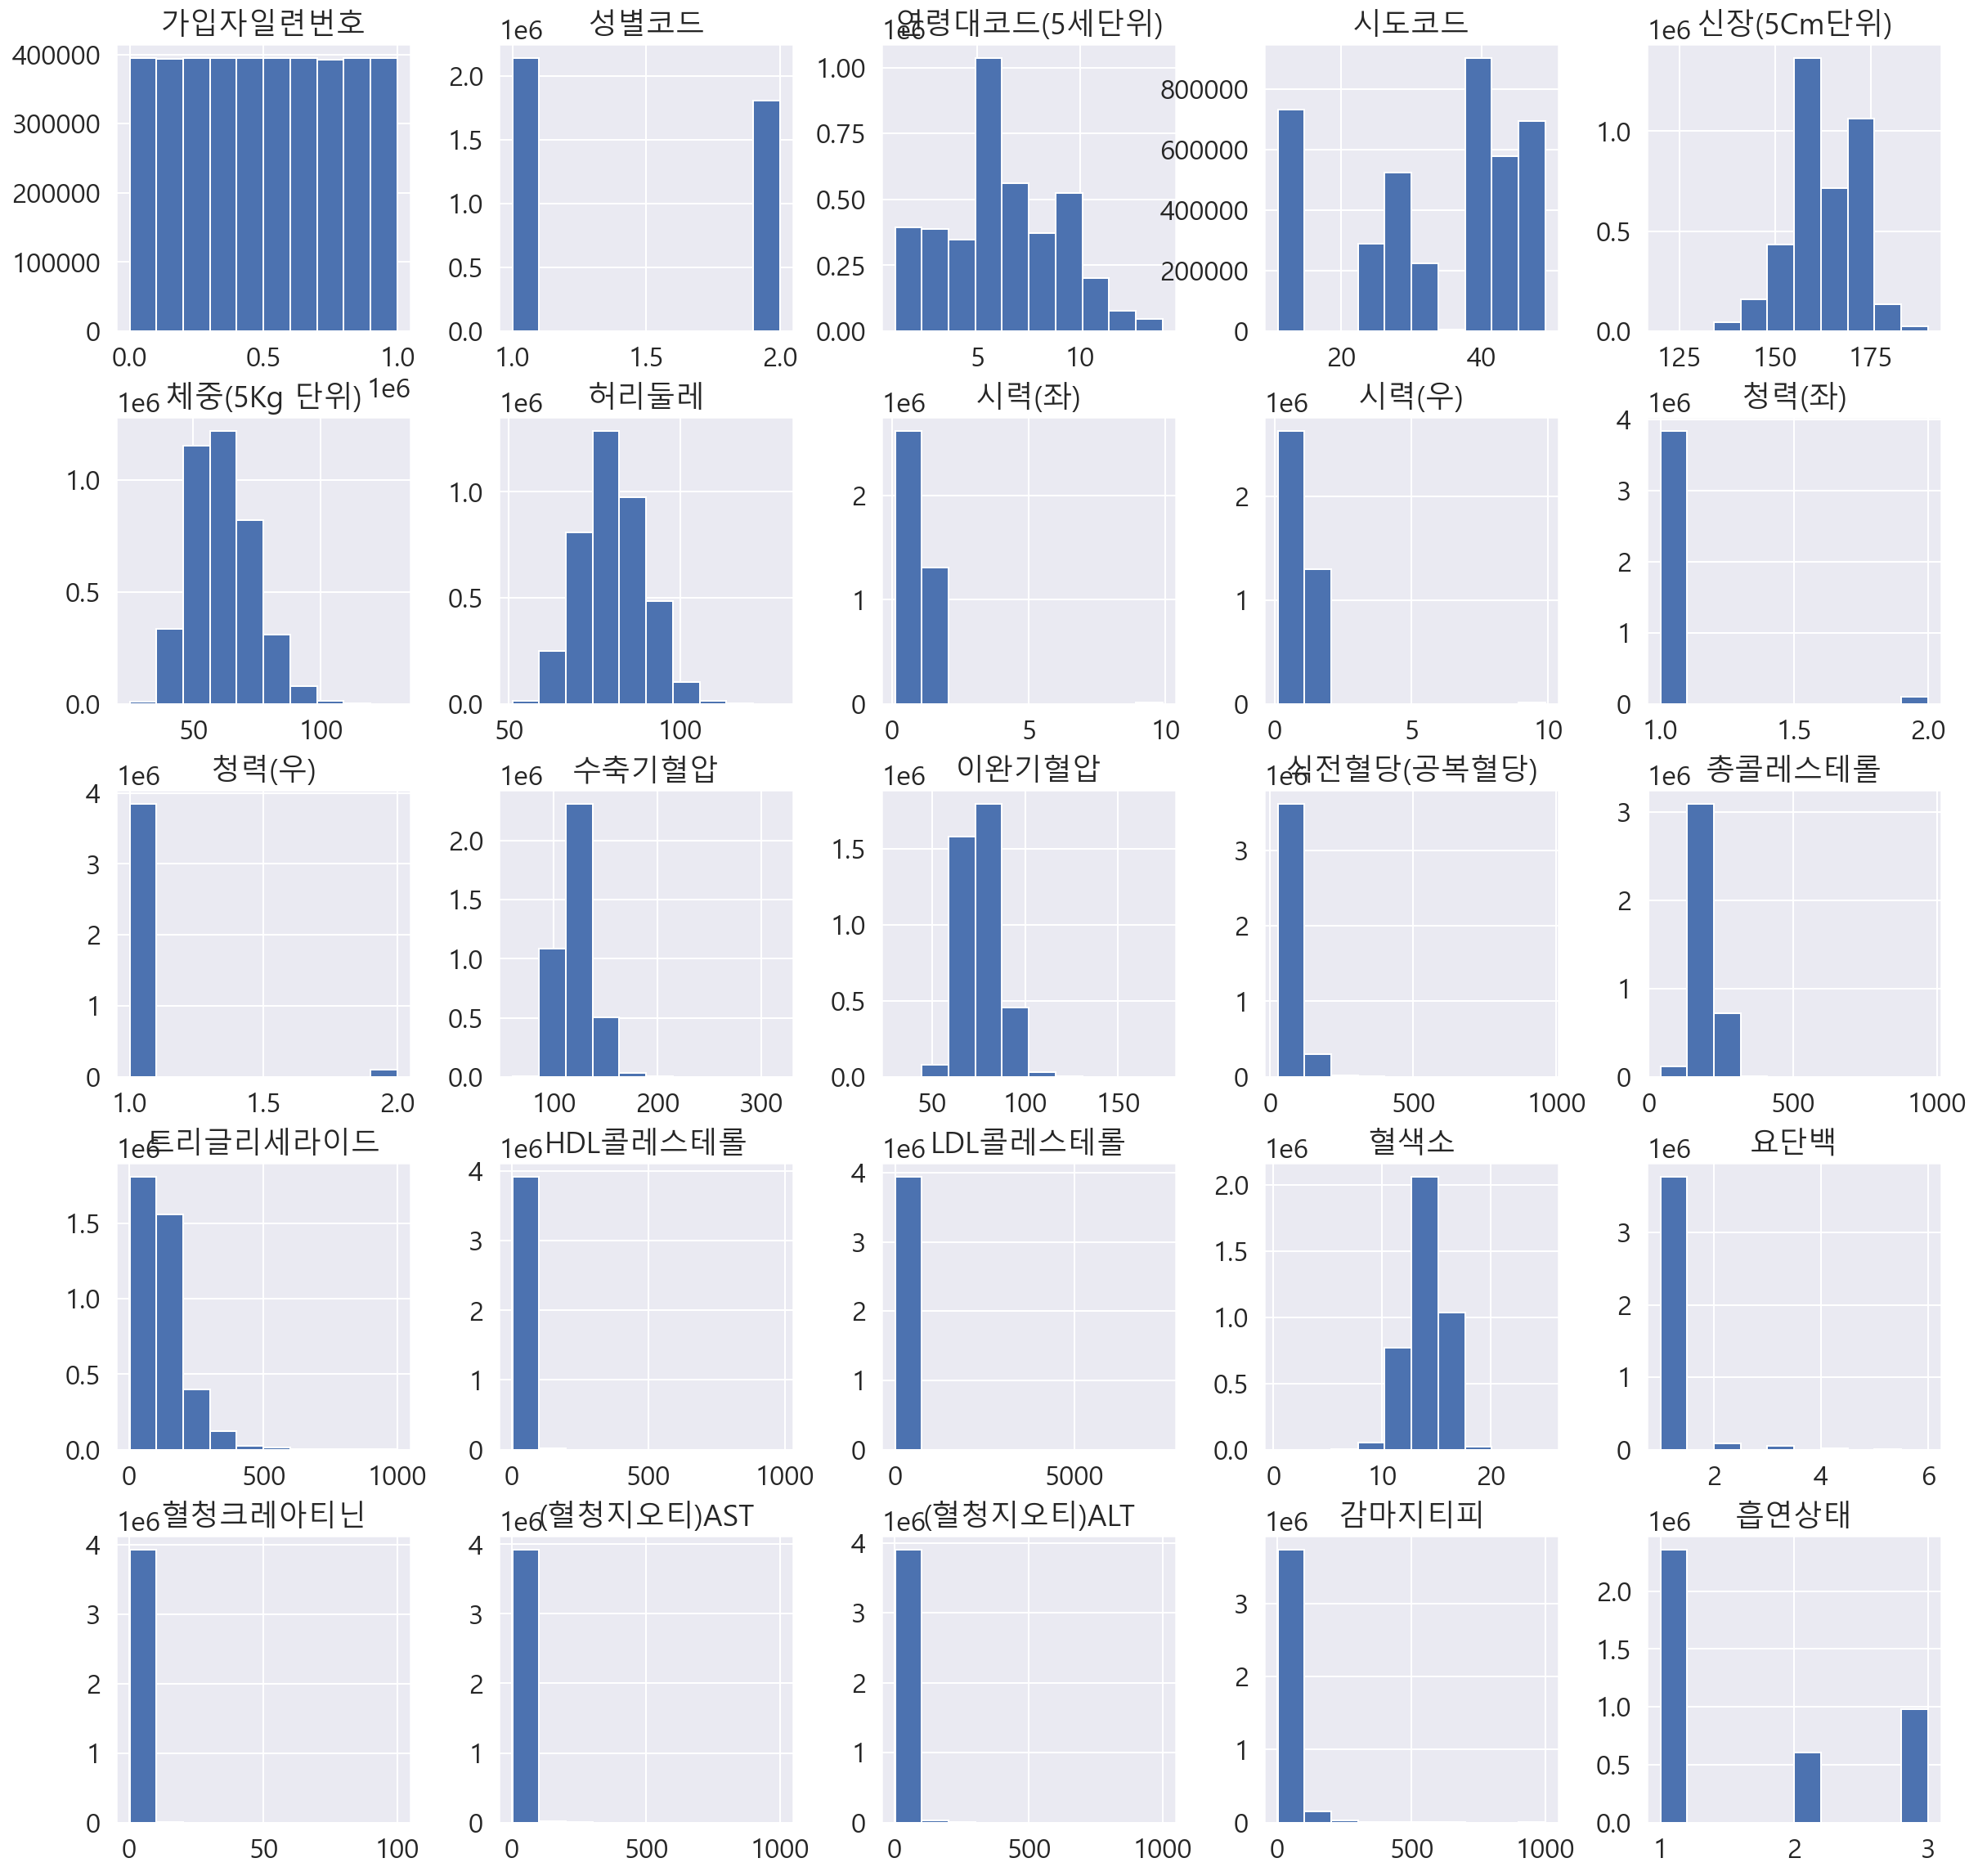

In [94]:
h = df.hist(figsize=(20,20)) # df.hist()를 변수에 넣으면 출력값 없이 바로 시각화를 출력

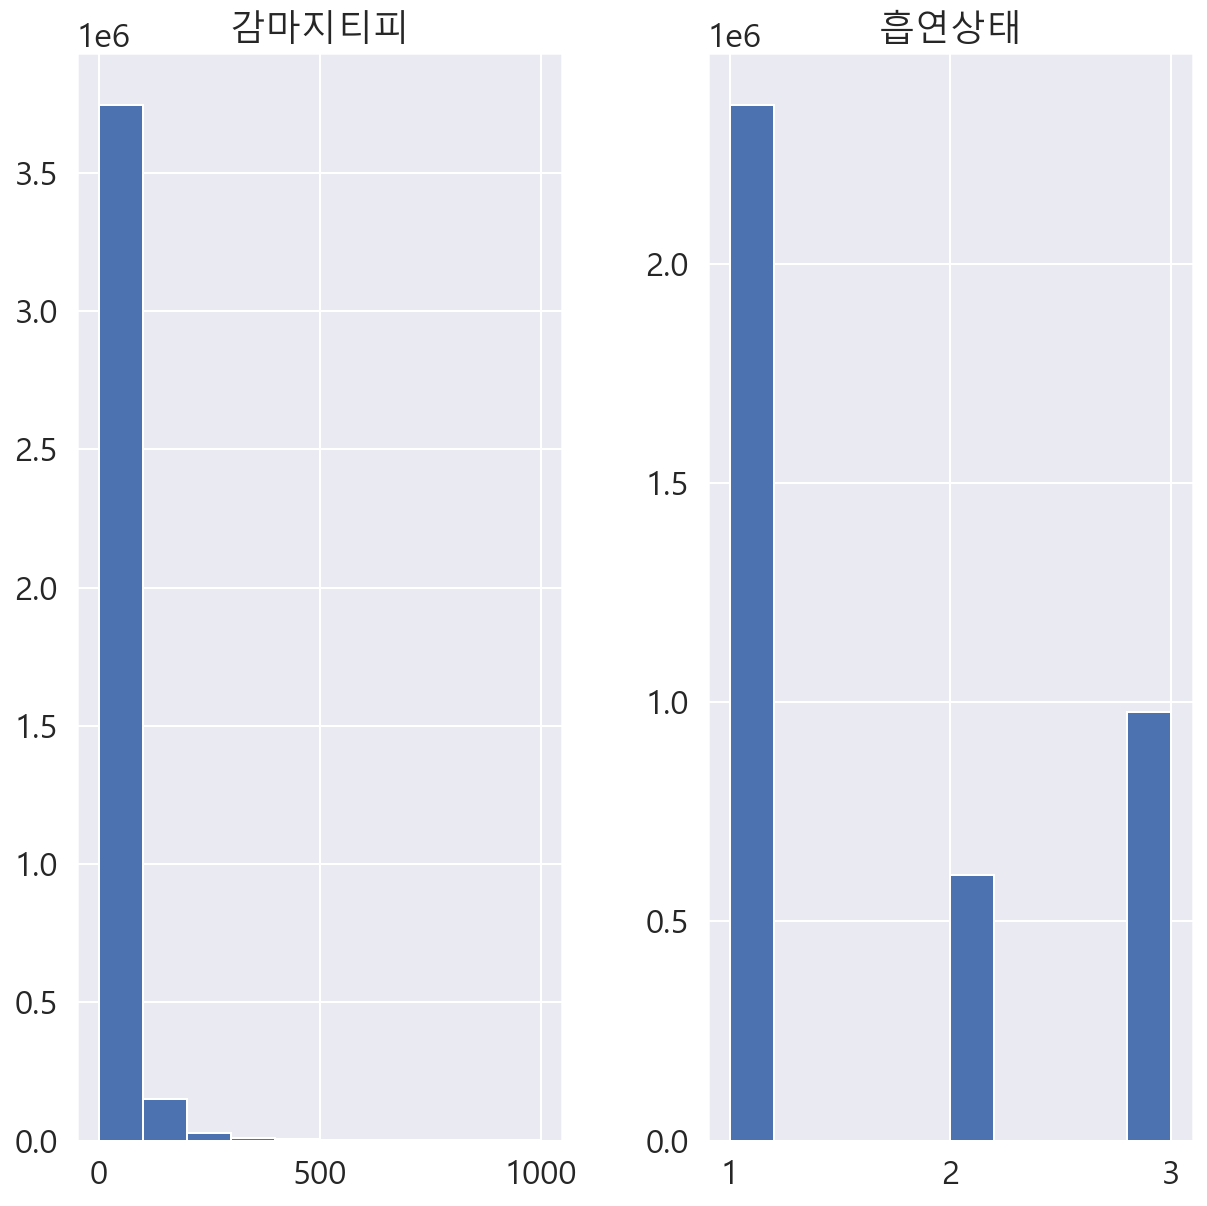

In [95]:
h = df.iloc[:, 23:26 ].hist(figsize=(10, 10))

# hue 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

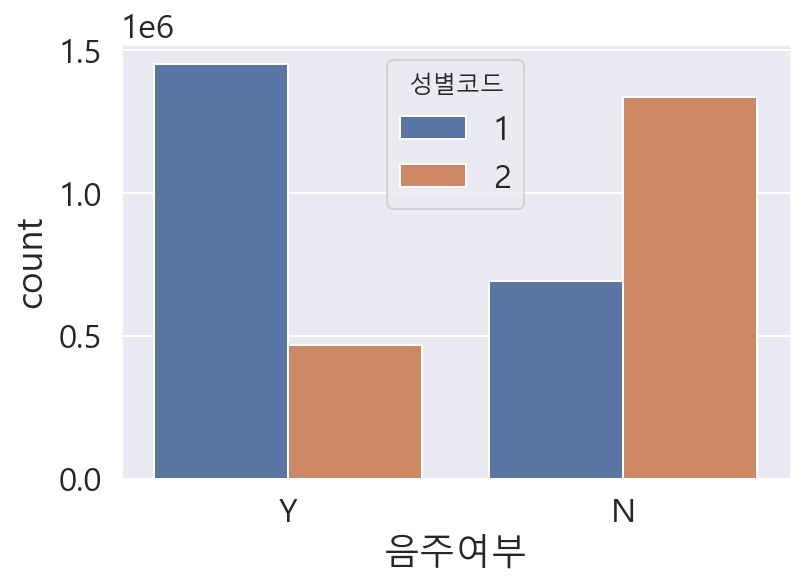

In [96]:
# 성별코드로 색상을 구분하여 그리기 > 남자가 여자 보다 술을 더 먹는 것을 알 수 있다./ 1 남자 2 여자
sns.countplot(x="음주여부", data=df, hue="성별코드")

<AxesSubplot:xlabel='음주여부', ylabel='count'>

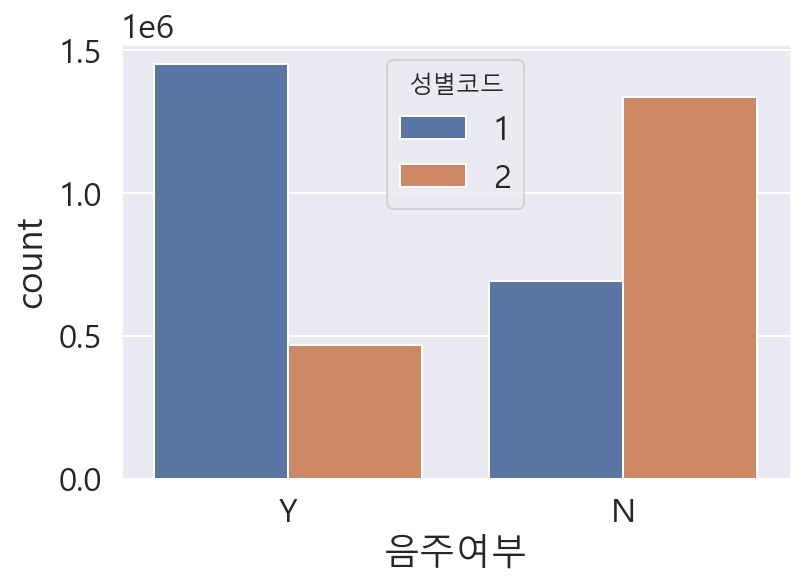

In [97]:
sns.set(font_scale=1.5, font="Malgun Gothic")

sns.countplot(x="음주여부", data=df, hue="성별코드")


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

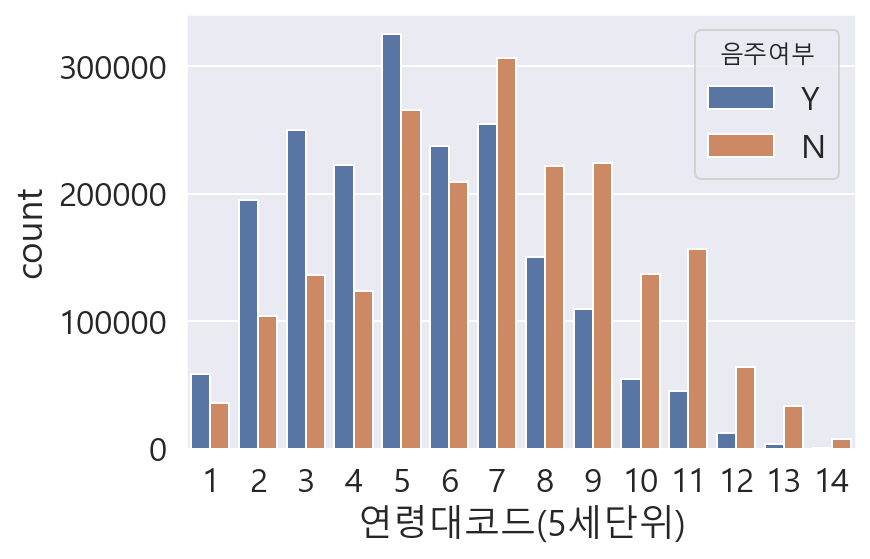

In [98]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

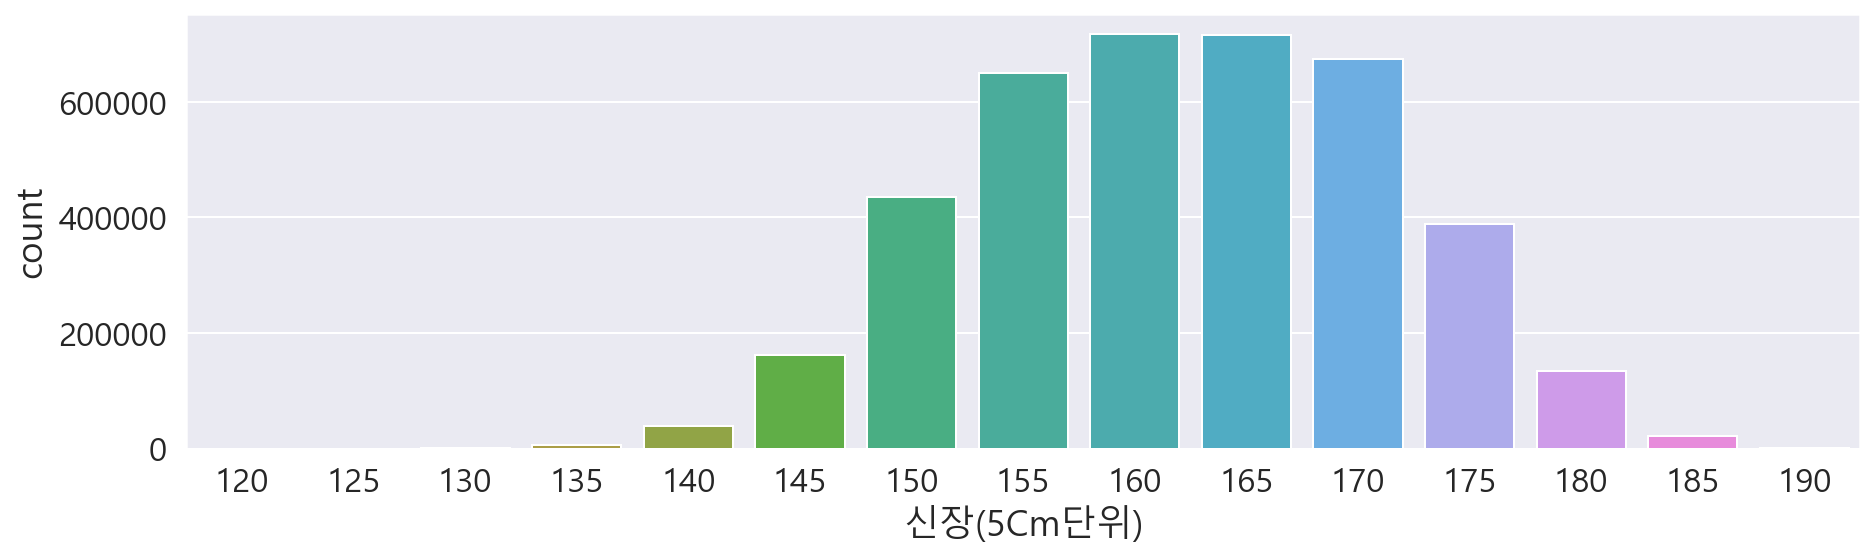

In [99]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

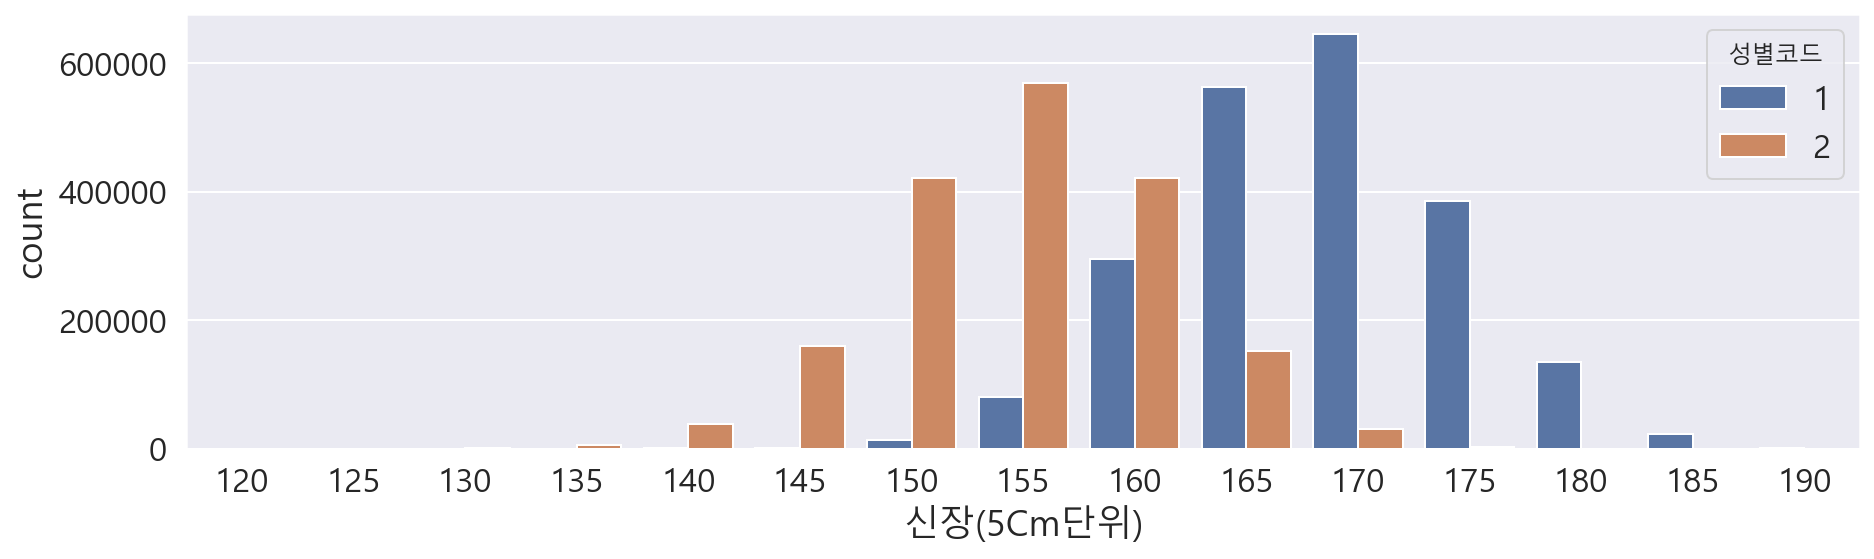

In [100]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")
## 성별코드에 따라서 신장을 알 수 있습니다. 남자와 여자가 신장 분포가 다른 것을 확인할 수 있습니다.
#성별 평균 키 알 수 있다. 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

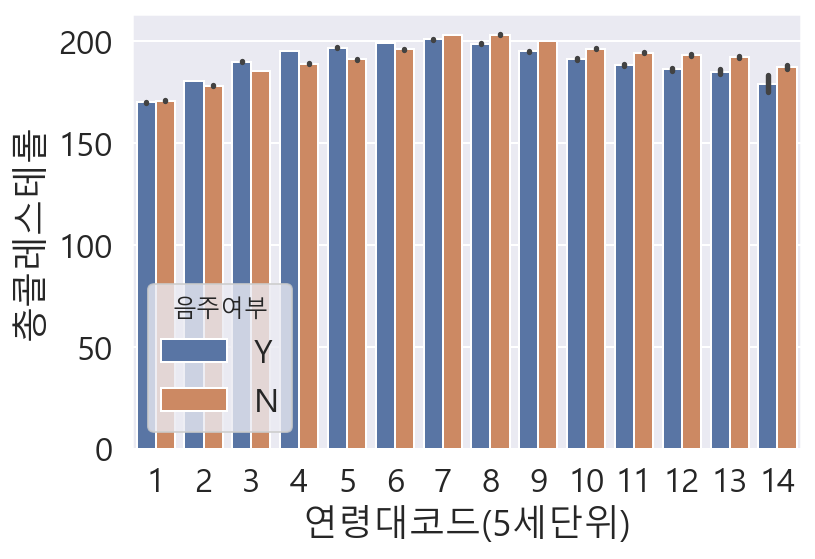

In [101]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

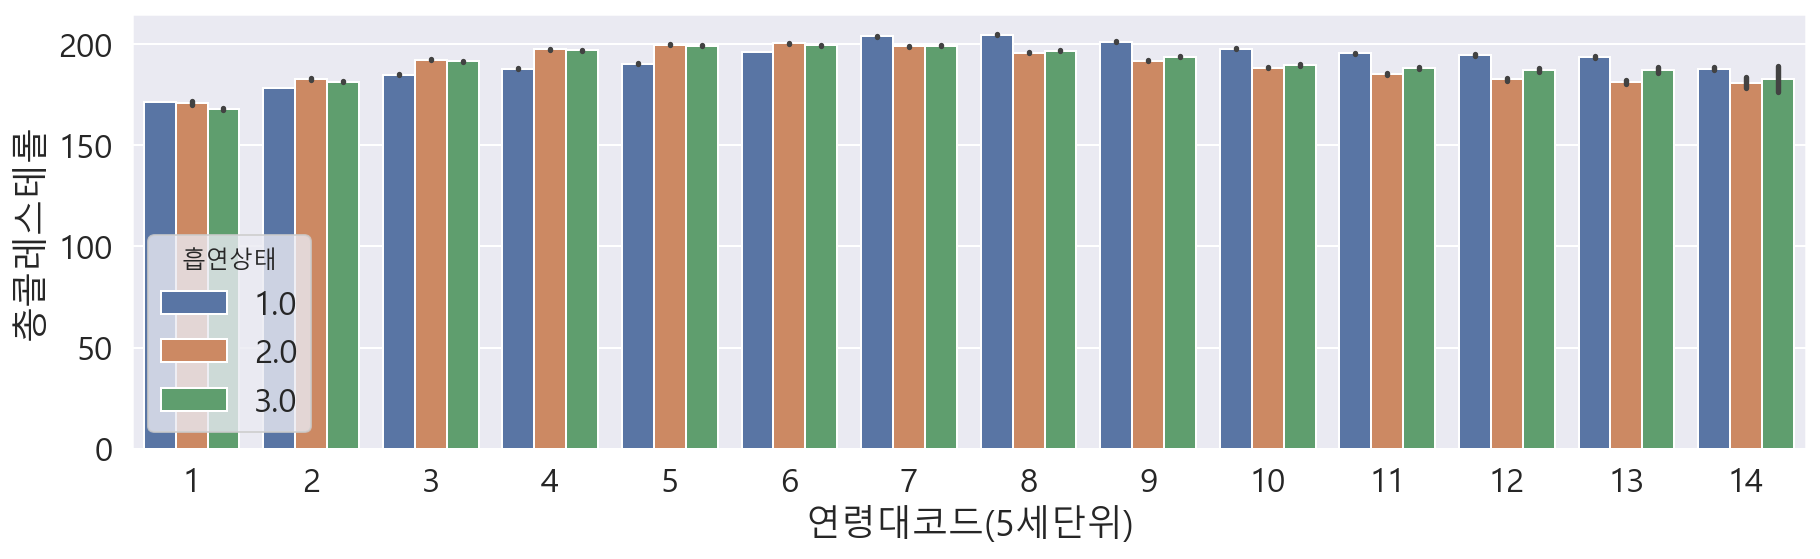

In [102]:
# 이번에는 흡연상태를 hue에 넣어봅니다.
plt.figure(figsize=(15,4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

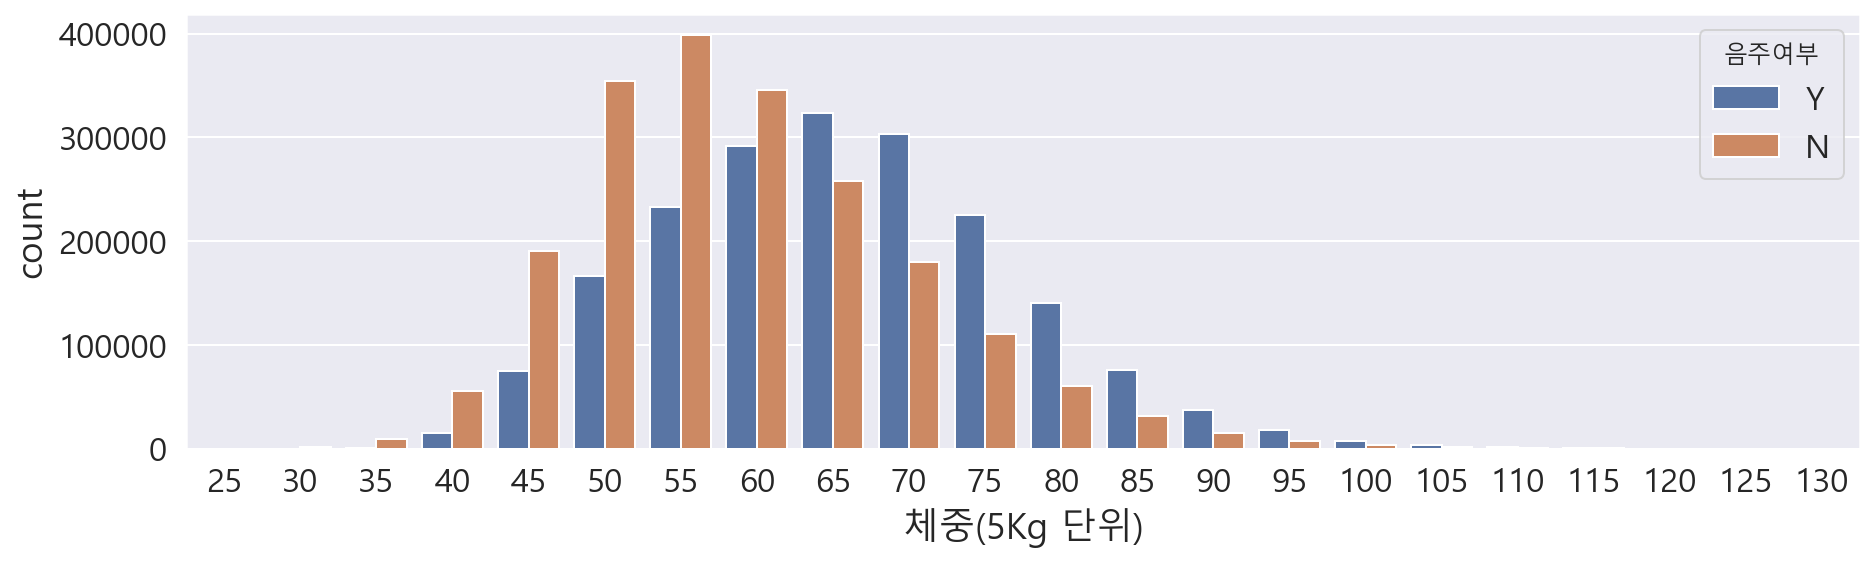

In [103]:
# 음주여부에 따른 체중의 차이

plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")


# 신뢰구간(ci)


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

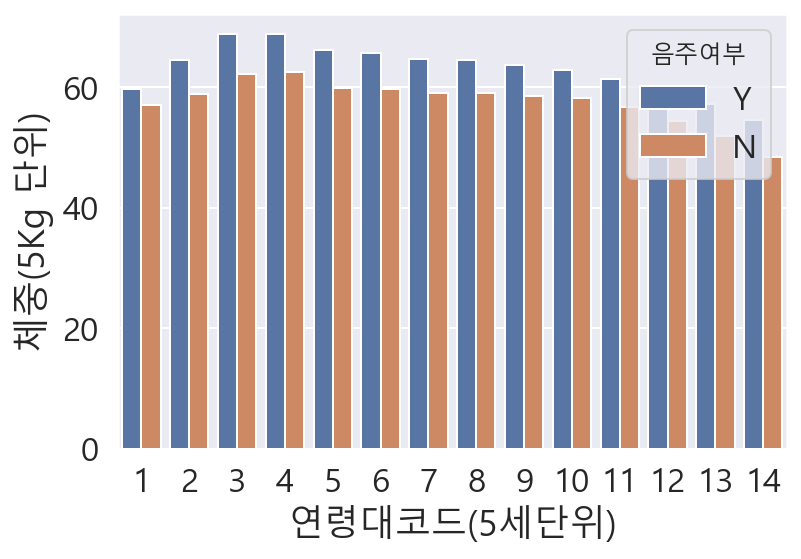

In [104]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

# 음주를 하는 사람들이 체중이 많이 나가는 경향이 보입니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

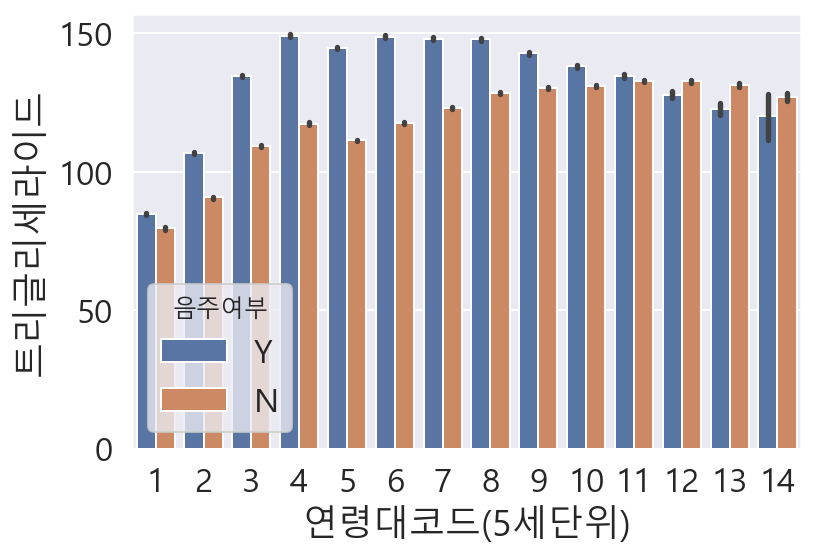

In [105]:
#보건의학 통계에서 가장 많이 사용하는 신뢰구간 95로 지정
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)

# ci는 신뢰구간 수준입니다. 95%의 신뢰구간을 지정하고 싶다면 95를 입력합니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

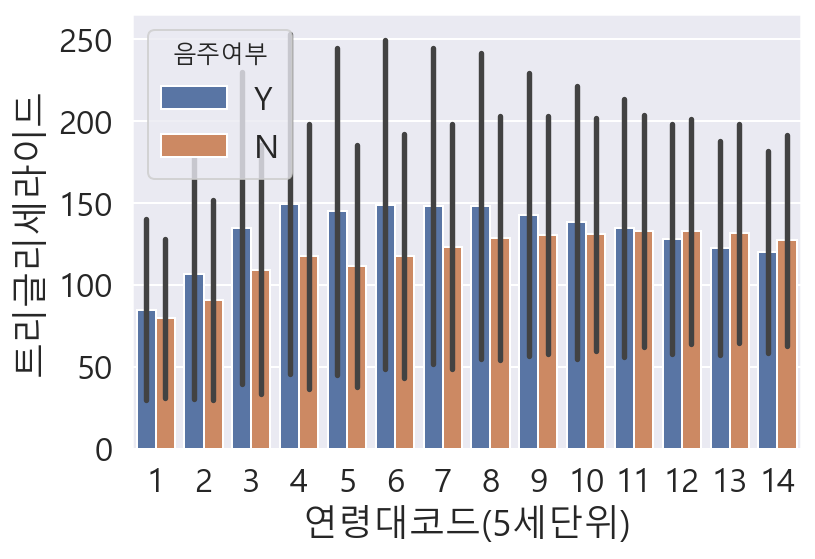

In [106]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부', ci='sd')

# 음주를 하는 사람이 트리글리세라이드(중성지방수치)가 높은 경향이 있습니다.


In [107]:
df.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

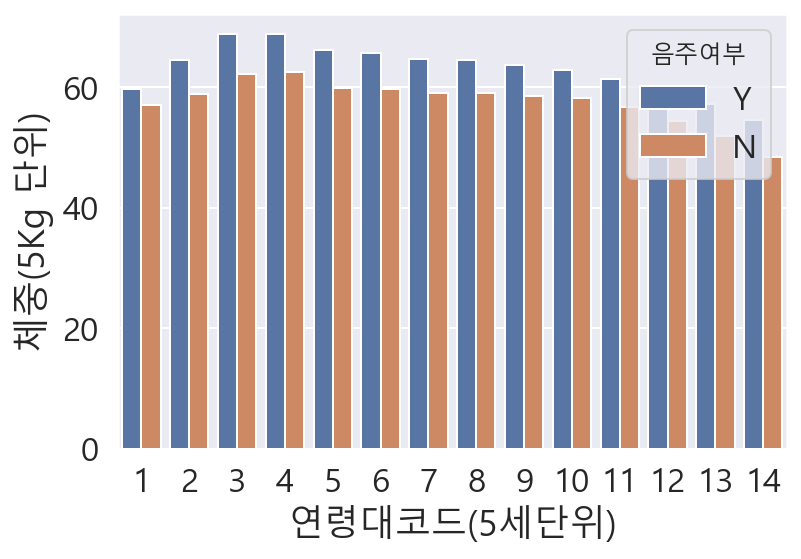

In [108]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

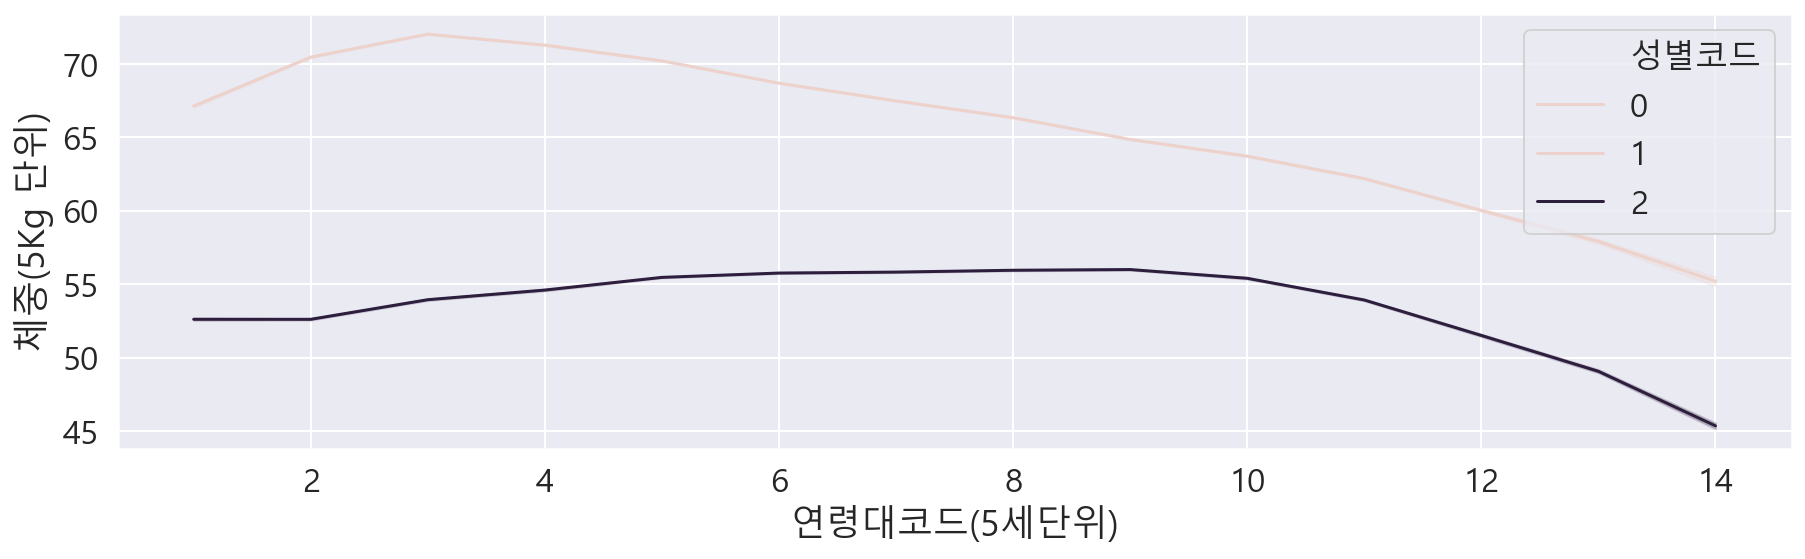

In [109]:
#lineplot

plt.figure(figsize=(15,4))

sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")

# y축은 평균입니다. 연령대가 높아질수록 체중이 낮아진다는 것을 볼 수 있습니다.


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

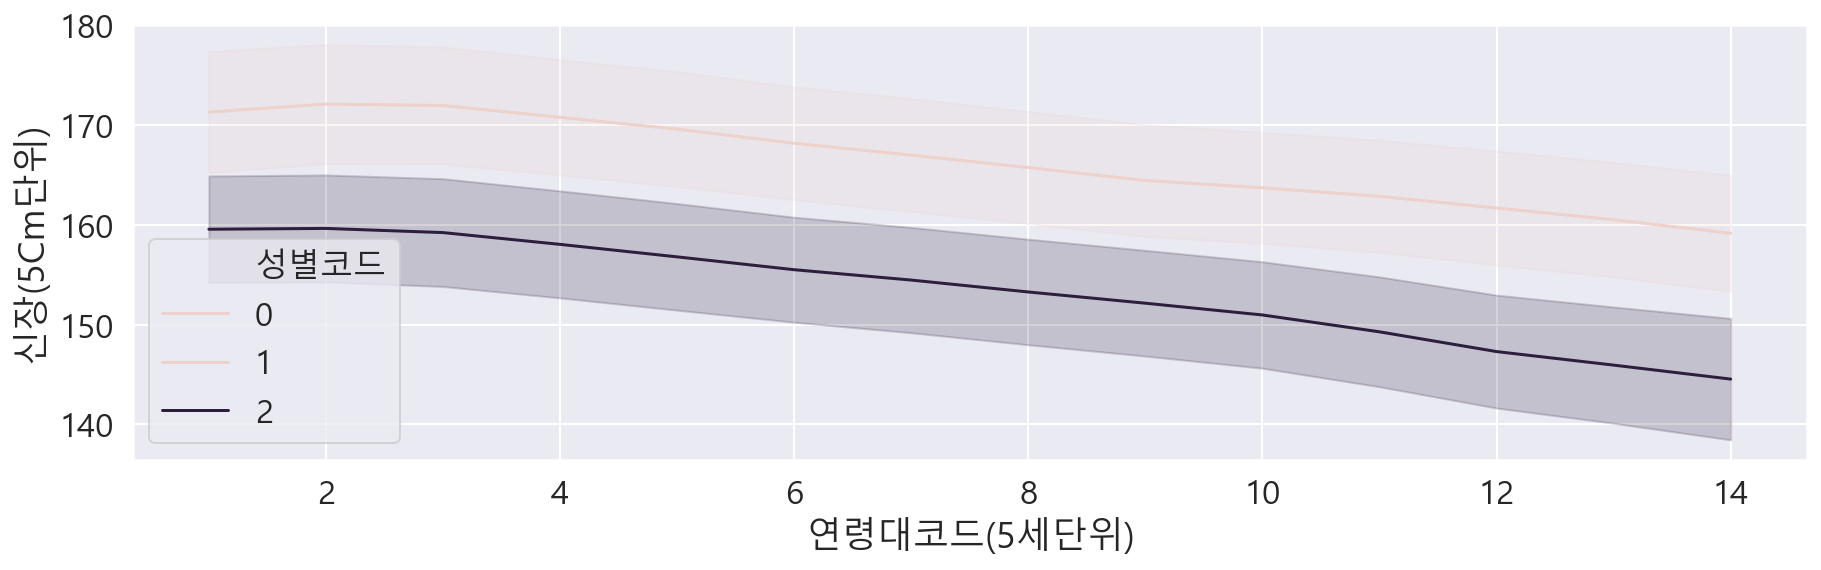

In [110]:
plt.figure(figsize=(15,4))

sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

# lineplot은 편차와 신뢰구간을 그림자로 표현합니다. 그래프 뒤쪽에 그림자가 없는 이유는 모수가 적어서 편차를 그릴 게 없기 때문.

# 나이가 커질수록 신장이 조금씩 작아진다

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

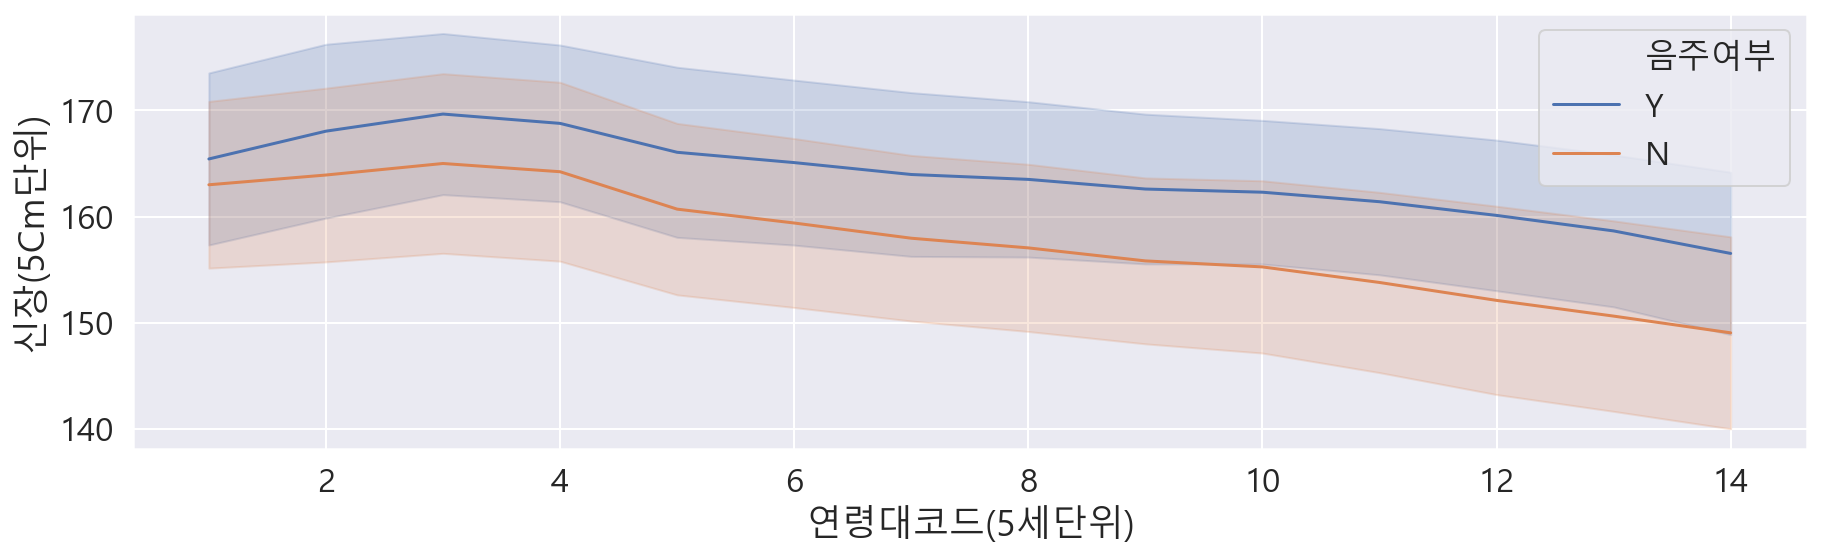

In [111]:
plt.figure(figsize=(15,4))

sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

# 키는 음주하고 있는 사람들이 약간 더 큰 편입니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

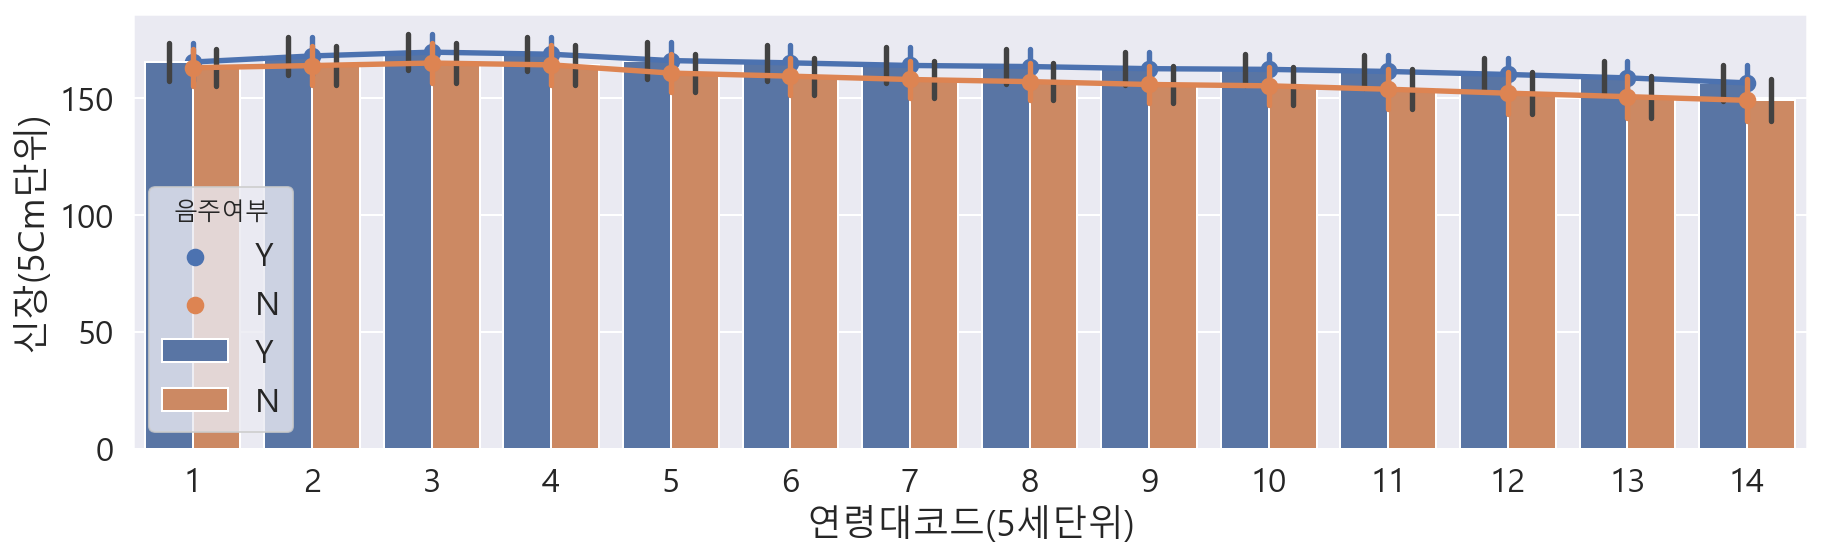

In [112]:
# 그래프를 같이 그릴 수도 있습니다.
plt.figure(figsize=(15,4))

sns.barplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')
sns.pointplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

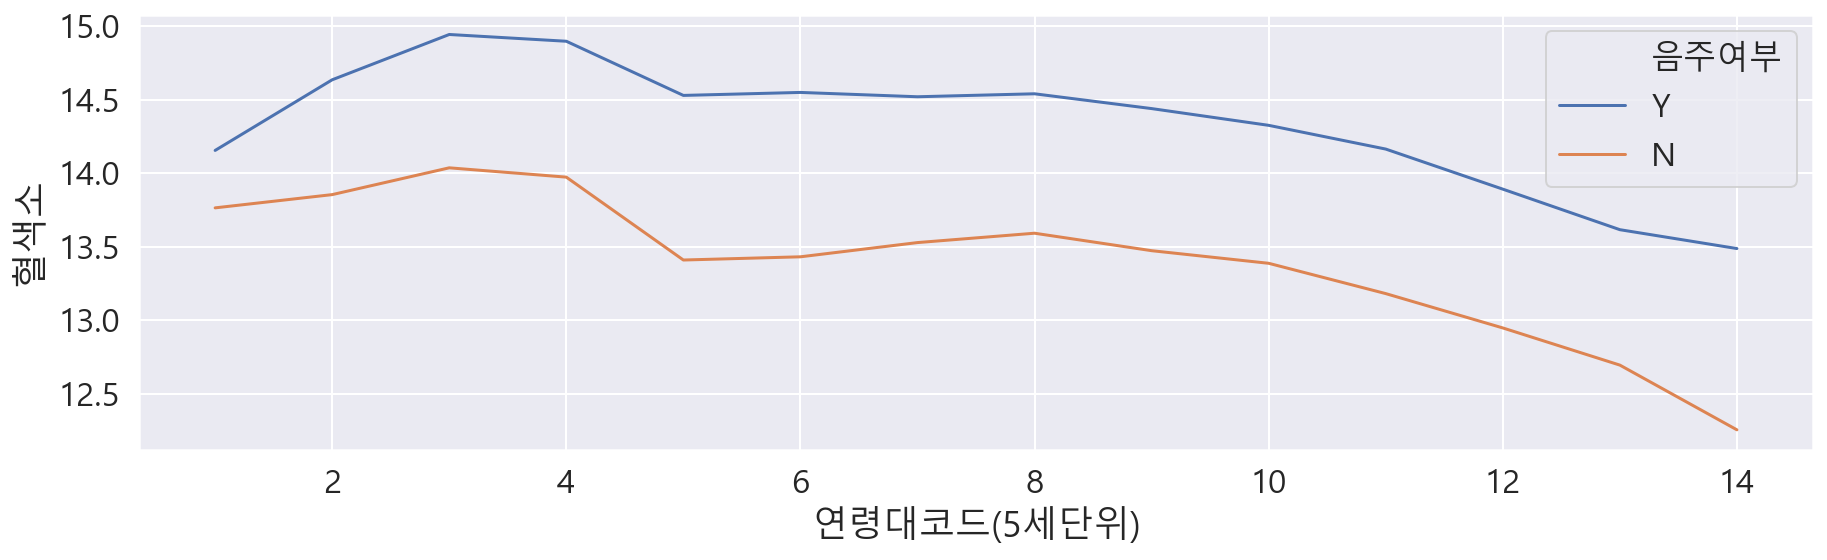

In [113]:
plt.figure(figsize=(15, 4))

sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

# 연령대가 높아질수록 혈색소가 줄어들고 있습니다. 음주를 하면 혈색소가 평균적으로 더 높습니다.


In [114]:
# barplot은 막대로 개별값을 표현하는데 lineplot, pointplot을 통해서는 선으로 기울기까지 표현할 수 있다. 

# 가격 데이터, 매출/재고 데이터는 대체로 lineplot, pointplot으로 그리는 것이 좋다

# boxplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

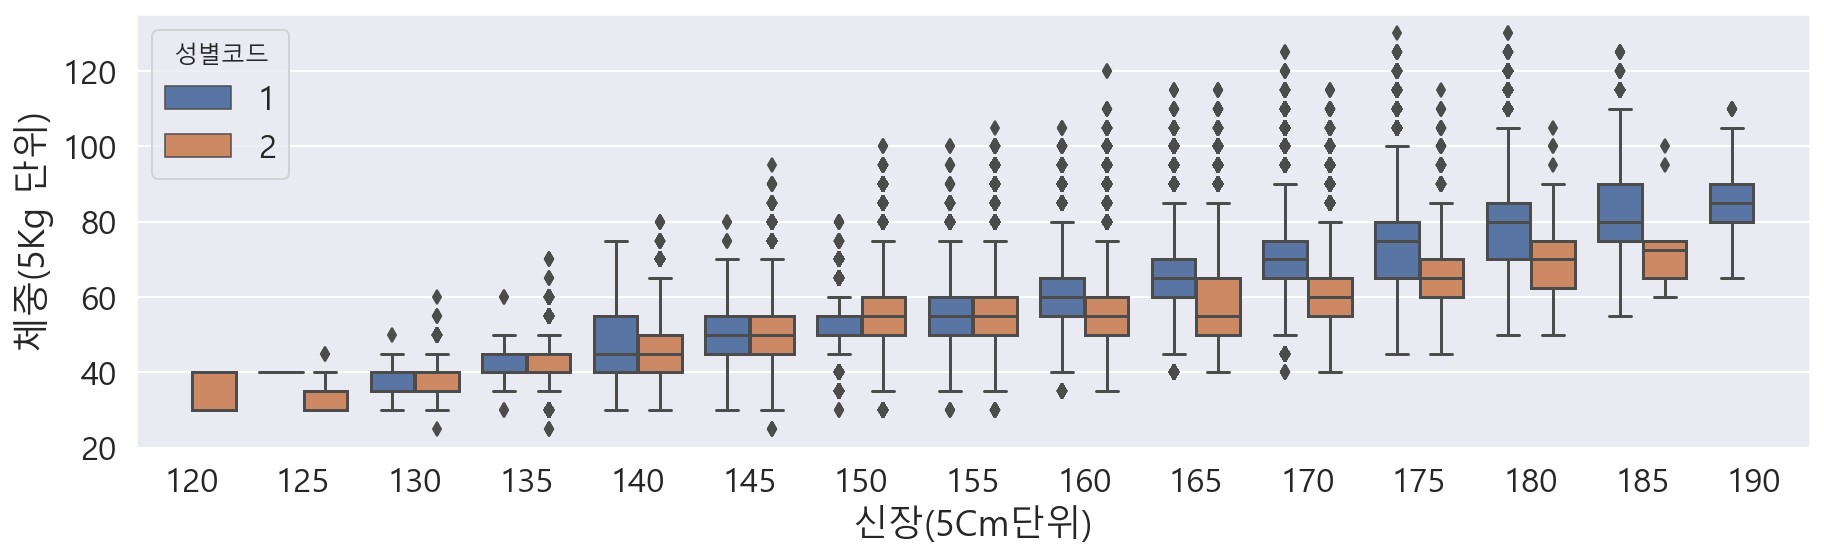

In [115]:
plt.figure(figsize=(15, 4))

sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

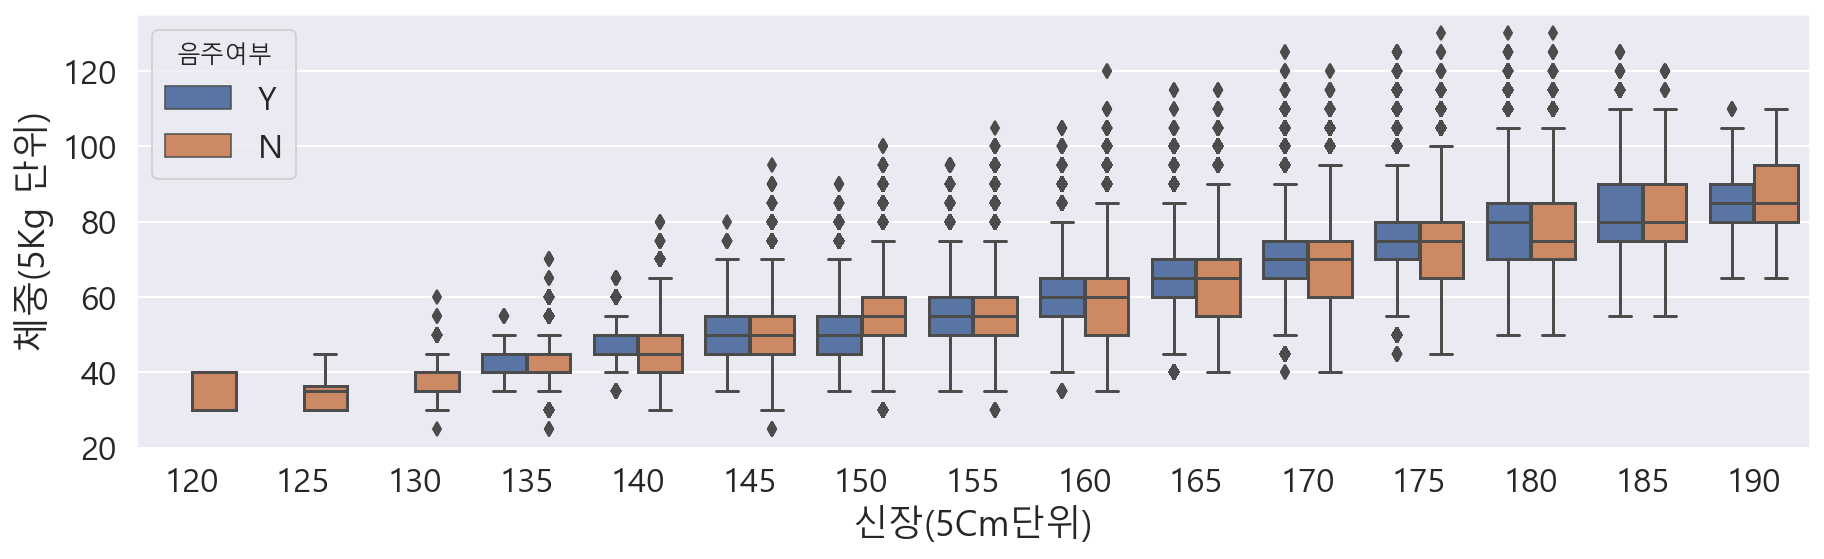

In [116]:
plt.figure(figsize=(15, 4))

sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

In [117]:
# size라는 옵션으로 체중에 따라 크기를 다르게 지정할 수 있습니다.

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg 단위)")


<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 576x504 with 1 Axes>

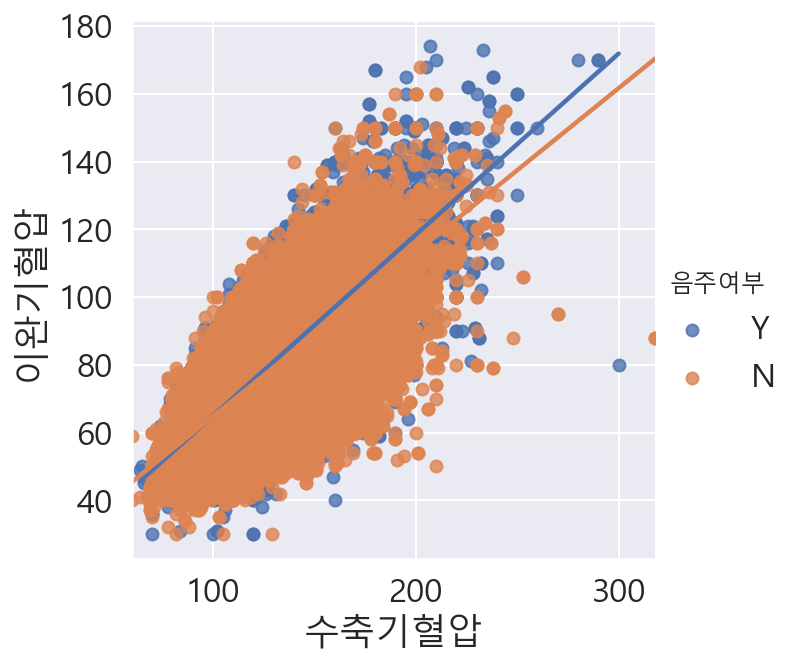

In [122]:
sns.lmplot(data=df, x="수축기혈압", y="이완기혈압", hue="음주여부")
# 음주여부에 따라 건강검진 수치가 차이가 있습니다.

In [123]:
#상관계수
# 상관계수는 변수들 간의 관계를 알아볼 때 유용한 개념입니다. 특정 데이터에 대한 상관관계를 볼 수 있습니다. 상관계수는 -1부터 1사이로 구성되고, 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있다.
# 상관계수는 두 변수 간의 연관된 정도만 나타낼 뿐 인과관계를 설명하는 것은 아니다.
# 우선 columns 변수 안에 상관계수에 사용할 컬럼들을 담는다.
columns = ['연령대코드(5세단위)','체중(5Kg 단위)','신장(5Cm단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)ALT','(혈청지오티)AST','감마지티피','흡연상태','음주여부']

In [124]:
df_small = df[columns]
df_corr = df_small.corr()

# heatmap

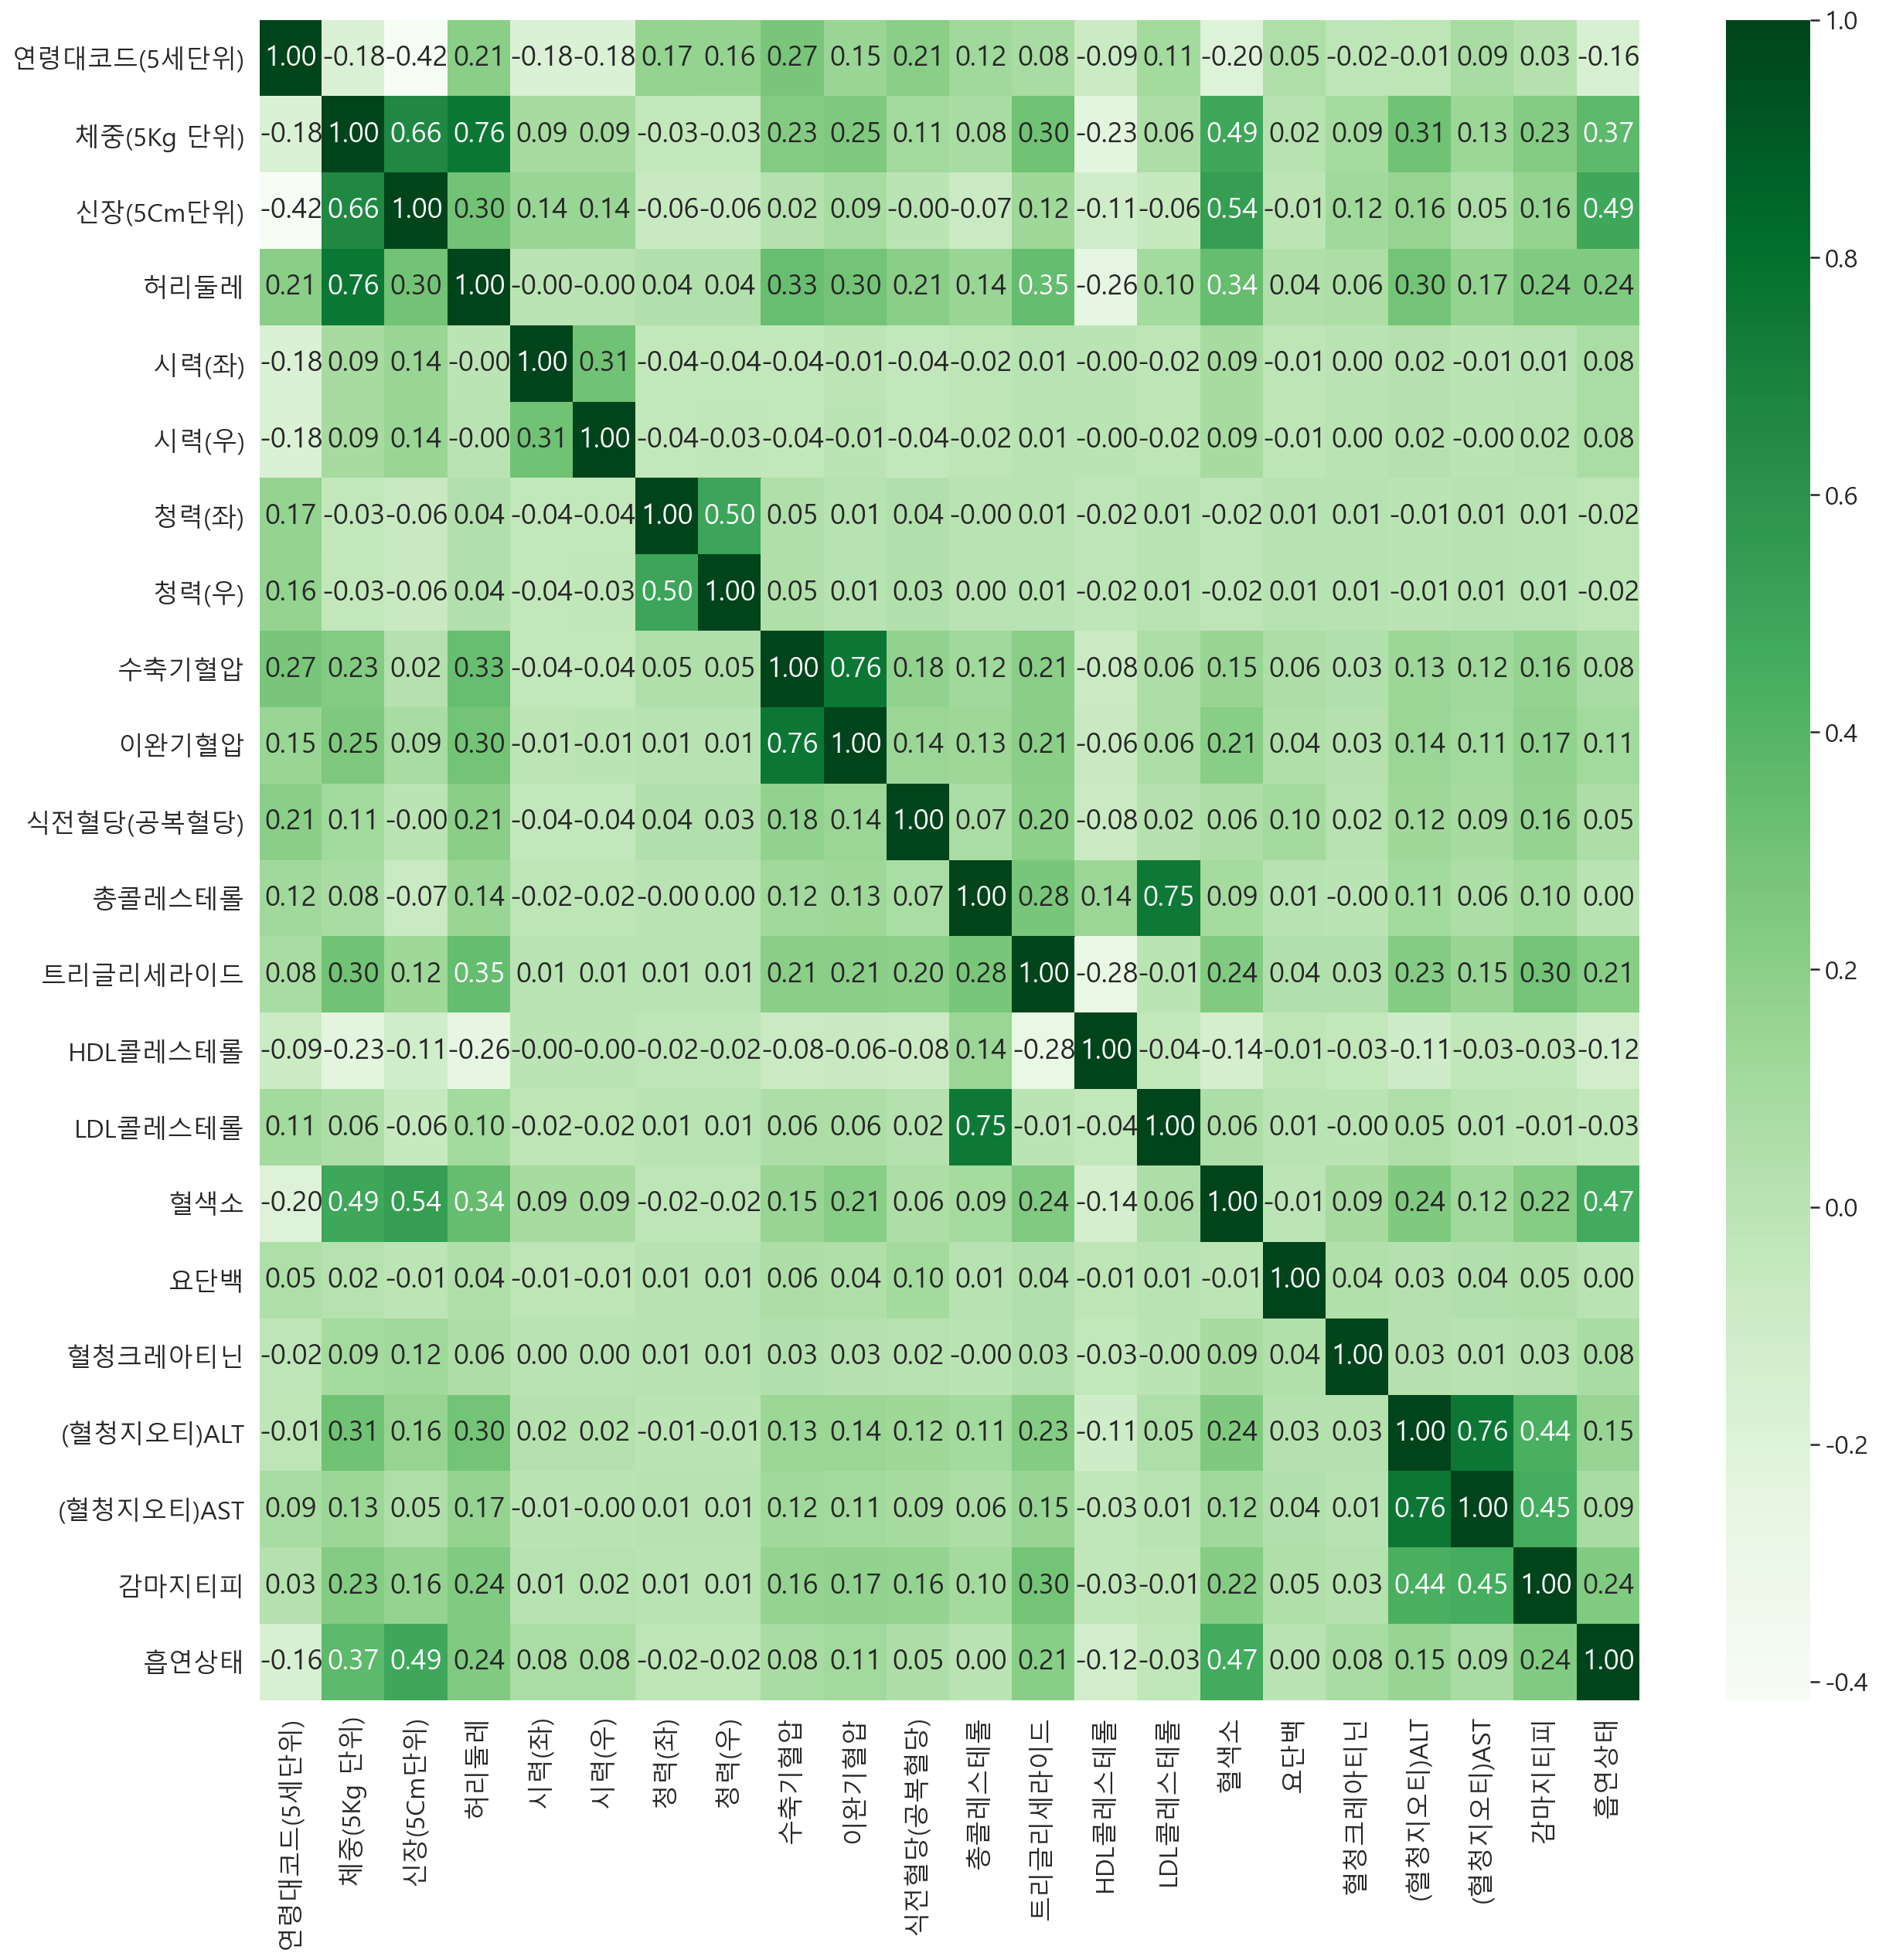

In [125]:
# 다른 그래프와 달리 heatmap은 바로 data만 넣어줍니다. 상관 관계가 클수록 값이 색이 진해진다.
# annot 옵션으로 숫자를 나타낼 수 있고, fmt으로 소수점 갯수를 지정할 수 있고, cmap으로 색상을 지정할 수 있다.
plt.figure(figsize=(20,20))
ax=sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Greens")

In [126]:
ax.figure.savefig('./datasets/140_up_123.png')#2011,2012,2013